Uncomment the following lines and install the libraries

In [1]:
#pip install datasets==2.14.5

In [2]:
#pip install langchain_community

In [3]:
#pip install sentence_transformers

In [4]:
#pip install openai==0.28.1

In [12]:
import numpy as np
import seaborn as sns

To run the codes you need to have a HuggingFace account and a HuggingFace access token

* To open an account join [here](https://huggingface.co/join)

* To create a token, check [here](https://huggingface.co/docs/hub/en/security-tokens)

If you are using Google colab, add your token as a secret using HF_TOKEN as the Name and the token as Value

OPTIONAL

* There is also an implementation using OpenAI API key, if you have one add your key to the secrets with OPENAI_API_KEY as Name and key as Value



**Semantic Similarity**

In [5]:
## A list of sentences
sentences = [
    "the hive of bees protect their queen",                         # 0
    "a beehive is an enclosed structure in which honey bees live",  # 1
    "a condominium is an enclosed structure in which people live",  # 2
    "the flying stinging insects guard the matriarch"               # 3
]

In [6]:
from langchain_community.embeddings import HuggingFaceBgeEmbeddings

##Import embedding model
model_name = "BAAI/bge-small-en"
model_kwargs = {"device": "cpu"}
encode_kwargs = {"normalize_embeddings": True}
hf = HuggingFaceBgeEmbeddings(model_name=model_name, model_kwargs=model_kwargs, encode_kwargs=encode_kwargs)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/90.8k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/684 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [7]:
# Embed the sentences and append to a list

embeddings =[]

for sentence in sentences:
  embedding = hf.embed_query(sentence)
  embeddings.append(embedding)

In [8]:
len(embeddings)

4

In [9]:
## Check lenght of the vector for each sentence
len(embeddings[0]), len(embeddings[1])

(384, 384)

In [13]:
## convert to and array and Check the shape of the array
embeddings_arr = np.array(embeddings)
embeddings_arr.shape

(4, 384)

In [15]:
## perform a dot product with the embedding array and it's transpose

dot_prod_embeddings = np.dot(embeddings_arr, embeddings_arr.T)
dot_prod_embeddings.shape

(4, 4)

<Axes: >

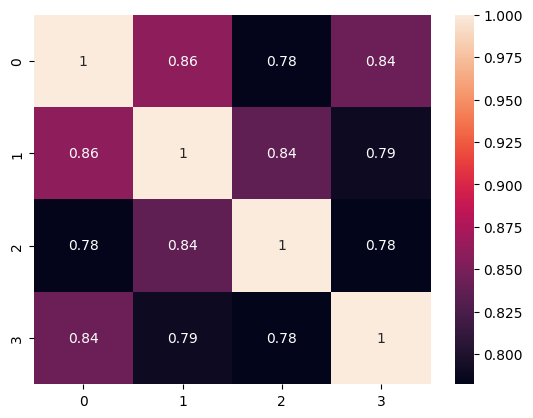

In [18]:
## plot an heatmap to show similarities
sns.heatmap(dot_prod_embeddings, annot=True)

Using Opensource model with Cosine Similarity

In [ ]:
## import sentence transformer
from sentence_transformers import SentenceTransformer

In [ ]:
## pick a model from HuggingFace
model = SentenceTransformer("all-MiniLM-L6-v2")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
sentences1 = ['The cat sits outside',
              'A man is playing guitar',
              'The movies are awesome']

In [ ]:
## embed the sentences
embeddings1 = model.encode(sentences1, convert_to_tensor=True)

In [ ]:
sentences2 = ['The dog plays in the garden',
              'A woman watches TV',
              'The new movie is so great']

In [ ]:
## embed the sentences
embeddings2 = model.encode(sentences2,
                           convert_to_tensor=True)

In [ ]:
from sentence_transformers import util

In [ ]:
## use cosine similarity to check correlation
cosine_scores = util.cos_sim(embeddings1,embeddings2)

In [ ]:
## print the results
for i in range(len(sentences1)):
    print("{} \t\t {} \t\t Score: {:.4f}".format(sentences1[i],
                                                 sentences2[i],
                                                 cosine_scores[i][i]))

The cat sits outside 		 The dog plays in the garden 		 Score: 0.2838
A man is playing guitar 		 A woman watches TV 		 Score: -0.0327
The movies are awesome 		 The new movie is so great 		 Score: 0.6571


OPTIONAL (only if you have access to OpenAI's API Key)

Using OpenAI's API

In [19]:
import openai

from google.colab import userdata


openai.api_key = userdata.get('OPENAI_API_KEY')

model =  "text-embedding-3-small"#"text-embedding-ada-002"

res = openai.Embedding.create(input=sentences, engine=model)

In [20]:
embeds = [r["embedding"] for r in res["data"]]
len(embeds)

4

In [21]:
len(embeds[0]), len(embeds[1]), len(embeds[2]), len(embeds[3])

(1536, 1536, 1536, 1536)

In [22]:


embeds_arr = np.array(embeds)
embeds_arr.shape

(4, 1536)

In [23]:
dot_prod_embeds = np.dot(embeds_arr, embeds_arr.T)
dot_prod_embeds.shape

(4, 4)

<Axes: >

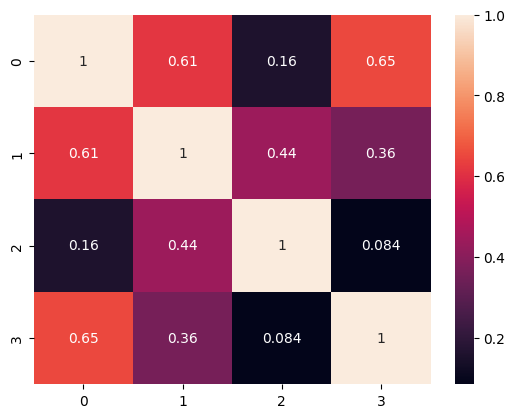

In [24]:
import seaborn as sns

sns.heatmap(dot_prod_embeds, annot=True)